In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Loading
## Wheat Data set!

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/crops_dataset/wheat.csv')

In [ ]:
df

,District Name,Market Name,Commodity,Variety,Grade,Min Price (Rs./Quintal),Max Price (Rs./Quintal),Modal Price (Rs./Quintal),Price Date,State
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009,Andhra Pradesh
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014,Andhra Pradesh
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014,Andhra Pradesh
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,10-05-2014,Andhra Pradesh
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,20-03-2014,Andhra Pradesh
...,...,...,...,...,...,...,...,...,...,...
470542,Ajmer,Ajmer (Grain),Wheat,Other,FAQ,1250.0,2200.0,1350.0,16-06-2012,Rajasthan
470543,Ajmer,Ajmer (Grain),Wheat,Other,FAQ,1300.0,2100.0,1400.0,15-06-2012,Rajasthan
470544,Ajmer,Ajmer (Grain),Wheat,Other,FAQ,1275.0,2275.0,1325.0,14-06-2012,Rajasthan
470545,Ajmer,Ajmer (Grain),Wheat,Other,FAQ,1250.0,2300.0,1300.0,13-06-2012,Rajasthan


# Pre-processing

In [ ]:
df.shape

(470547, 10)

In [ ]:
rows = df.shape[0]
rows

470547

In [ ]:
cols = df.shape[1]
cols

10

In [ ]:
df.isna().any()

District Name                False
Market Name                  False
Commodity                    False
Variety                      False
Grade                        False
Min Price (Rs./Quintal)      False
Max Price (Rs./Quintal)      False
Modal Price (Rs./Quintal)    False
Price Date                   False
State                        False
dtype: bool

## Dealing with Null Values!

In [ ]:
# Number of Null values in the entire dataframe
df.isna().sum().sum()

0

In [ ]:
## Checking number of null values in all the columns!

column_names = list(df.columns)
for i in range(0, len(column_names)):
  print(f"Column No: {i+1} = {column_names[i]} has {df[column_names[i]].isna().sum()} Null values!")

Column No: 1 = District Name has 0 Null values!
Column No: 2 = Market Name has 0 Null values!
Column No: 3 = Commodity has 0 Null values!
Column No: 4 = Variety has 0 Null values!
Column No: 5 = Grade has 0 Null values!
Column No: 6 = Min Price (Rs./Quintal) has 0 Null values!
Column No: 7 = Max Price (Rs./Quintal) has 0 Null values!
Column No: 8 = Modal Price (Rs./Quintal) has 0 Null values!
Column No: 9 = Price Date has 0 Null values!
Column No: 10 = State has 0 Null values!


In [ ]:
# No of unique values in all the columns

for i in range(0, len(column_names)):
  print(f'The column {column_names[i]} has {df[column_names[i]].nunique()} unique values!')

The column District Name has 213 unique values!
The column Market Name has 973 unique values!
The column Commodity has 1 unique values!
The column Variety has 51 unique values!
The column Grade has 4 unique values!
The column Min Price (Rs./Quintal) has 2428 unique values!
The column Max Price (Rs./Quintal) has 3213 unique values!
The column Modal Price (Rs./Quintal) has 2763 unique values!
The column Price Date has 5111 unique values!
The column State has 19 unique values!


In [ ]:
df.columns

Index(['District Name', 'Market Name', 'Commodity', 'Variety', 'Grade',
       'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date', 'State'],
      dtype='object')

In [ ]:
import pandas as pd

# Assuming df is your DataFrame
df.columns = df.columns.str.replace(' ', '_').str.lower()

# Alternatively, you can use the following code to replace spaces with underscores and convert to lowercase
# df.columns = [col.lower().replace(' ', '_') for col in df.columns]

# Now, the column names will be in lowercase and with underscores instead of spaces
print(df.columns)


Index(['district_name', 'market_name', 'commodity', 'variety', 'grade',
       'min_price_(rs./quintal)', 'max_price_(rs./quintal)',
       'modal_price_(rs./quintal)', 'price_date', 'state'],
      dtype='object')


In [ ]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009,Andhra Pradesh
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014,Andhra Pradesh
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014,Andhra Pradesh
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,10-05-2014,Andhra Pradesh
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,20-03-2014,Andhra Pradesh


In [ ]:
df['month'] = df['price_date'].str[3:5].astype(int)
df['year'] = df['price_date'].str[6:].astype(int)


In [ ]:
df.head(3)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,27-06-2009,Andhra Pradesh,6,2009
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,13-05-2014,Andhra Pradesh,5,2014
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,12-05-2014,Andhra Pradesh,5,2014


In [ ]:
df['price_date'].dtype


dtype('O')

In [ ]:
# Convert 'price_date' to timestamp
df['price_date'] = pd.to_datetime(df['price_date'], format='%d-%m-%Y')

# Convert 'month' and 'year' to int
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# Display the updated DataFrame
print(df.dtypes)

district_name                        object
market_name                          object
commodity                            object
variety                              object
grade                                object
min_price_(rs./quintal)             float64
max_price_(rs./quintal)             float64
modal_price_(rs./quintal)           float64
price_date                   datetime64[ns]
state                                object
month                                 int64
year                                  int64
dtype: object


In [ ]:
df_copy = df

# Encoding Columns

## district Name

In [ ]:
df['district_name'].nunique()

213

In [ ]:
value_counts = df['district_name'].value_counts()

In [ ]:
value_counts

Ahmednagar     27600
Nashik         20457
Buldhana       19344
Aurangabad     16942
Jalgaon        14384
               ...  
Gajapati           1
Sibsagar           1
Keonjhar           1
Ganjam             1
Khurda             1
Name: district_name, Length: 213, dtype: int64

In [ ]:
district_name_frequency = df['district_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['district_name_encoded'] = df['district_name'].map(district_name_frequency)

In [ ]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,Andhra Pradesh,6,2009,2324
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,Andhra Pradesh,5,2014,93
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,Andhra Pradesh,5,2014,93
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,Andhra Pradesh,5,2014,93
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,Andhra Pradesh,3,2014,93


## market name

In [ ]:
df['market_name'].nunique()

973

In [ ]:
value_counts = df['market_name'].value_counts()

In [ ]:
value_counts

Nagpur                               4775
Najafgarh                            4490
Pakur                                4390
Jalana                               4228
Bijapur                              4142
                                     ... 
Armori                                  1
Jalandhar Cantt(Hoshiarpur Road)        1
Basmat(Kurunda)                         1
Fruit Market                            1
Anakapally                              1
Name: market_name, Length: 973, dtype: int64

In [ ]:
market_name_frequency = df['market_name'].value_counts(normalize=False)

# Create a new column with encoded values
df['market_name_encoded'] = df['market_name'].map(market_name_frequency)

In [ ]:
df.head(5)

,district_name,market_name,commodity,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded
0,Visakhapatnam,Anakapally,Wheat,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,Andhra Pradesh,6,2009,2324,1
1,Cuddapah,Cuddapah,Wheat,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,Andhra Pradesh,5,2014,93,91
2,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,Andhra Pradesh,5,2014,93,91
3,Cuddapah,Cuddapah,Wheat,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,Andhra Pradesh,5,2014,93,91
4,Cuddapah,Cuddapah,Wheat,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,Andhra Pradesh,3,2014,93,91


In [ ]:
df = df.drop('commodity',axis=1)

## variety

In [ ]:
df['variety'].nunique()

51

In [ ]:
value_counts = df['variety'].value_counts()

In [ ]:
variety_frequency = df['variety'].value_counts(normalize=False)

# Create a new column with encoded values
df['variety_encoded'] = df['variety'].map(variety_frequency)

In [ ]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,Andhra Pradesh,6,2009,2324,1,2625
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,Andhra Pradesh,5,2014,93,91,305407
2,Cuddapah,Cuddapah,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,Andhra Pradesh,5,2014,93,91,305407
3,Cuddapah,Cuddapah,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,Andhra Pradesh,5,2014,93,91,305407
4,Cuddapah,Cuddapah,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,Andhra Pradesh,3,2014,93,91,305407


## grade

In [ ]:
df['grade'].unique()

array(['FAQ ', 'Medium ', 'Large ', 'Small '], dtype=object)

In [ ]:
value_counts = df['grade'].value_counts()
value_counts

FAQ        461040
Medium       9400
Large          65
Small          42
Name: grade, dtype: int64

In [ ]:
grade_frequency = df['grade'].value_counts(normalize=False)

# Create a new column with encoded values
df['grade_encoded'] = df['grade'].map(grade_frequency)

In [ ]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,Andhra Pradesh,6,2009,2324,1,2625,461040
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,Andhra Pradesh,5,2014,93,91,305407,461040
2,Cuddapah,Cuddapah,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,Andhra Pradesh,5,2014,93,91,305407,461040
3,Cuddapah,Cuddapah,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,Andhra Pradesh,5,2014,93,91,305407,461040
4,Cuddapah,Cuddapah,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,Andhra Pradesh,3,2014,93,91,305407,461040


## state

In [ ]:
df['state'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chattisgarh', 'Chandigarh',
       'NCT of Delhi', 'Goa', 'Himachal Pradesh', 'Haryana', 'Jharkhand',
       'Karnataka', 'Kerala', 'Maharashtra', 'Manipur', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Rajast'], dtype=object)

In [ ]:
value_counts = df['state'].value_counts()
value_counts

Maharashtra         254857
Jharkhand            52341
Karnataka            42094
Punjab               39916
Chattisgarh          28150
Haryana              25242
NCT of Delhi          8578
Bihar                 5455
Kerala                3133
Odisha                2828
Rajasthan             2669
Assam                 2615
Andhra Pradesh        2451
Nagaland                94
Himachal Pradesh        94
Goa                     12
Chandigarh              12
Manipur                  5
Rajast                   1
Name: state, dtype: int64

In [ ]:
state_frequency = df['state'].value_counts(normalize=False)

# Create a new column with encoded values
df['state_encoded'] = df['state'].map(state_frequency)

In [ ]:
df.head(5)

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,Andhra Pradesh,6,2009,2324,1,2625,461040,2451
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,Andhra Pradesh,5,2014,93,91,305407,461040,2451
2,Cuddapah,Cuddapah,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,Andhra Pradesh,5,2014,93,91,305407,461040,2451
3,Cuddapah,Cuddapah,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,Andhra Pradesh,5,2014,93,91,305407,461040,2451
4,Cuddapah,Cuddapah,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,Andhra Pradesh,3,2014,93,91,305407,461040,2451


# Taking only the Encoded columns

In [ ]:
df_encoded = df[['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded', 'month', 'year', 'price_date', 'min_price_(rs./quintal)', 'max_price_(rs./quintal)', 'modal_price_(rs./quintal)']]


# Encoded Dataset

In [ ]:
df_encoded.head(8)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,2324,1,2625,461040,2451,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,93,91,305407,461040,2451,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,93,91,305407,461040,2451,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,93,91,305407,461040,2451,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,93,91,305407,461040,2451,3,2014,2014-03-20,1548.0,1610.0,1579.0
5,93,91,305407,461040,2451,3,2014,2014-03-19,1545.0,1551.0,1548.0
6,93,91,305407,461040,2451,3,2014,2014-03-15,1551.0,1642.0,1596.0
7,93,91,305407,461040,2451,3,2014,2014-03-13,1575.0,1918.0,1746.0


# Heat Map

<ipython-input-44-f636cb7d937b>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)


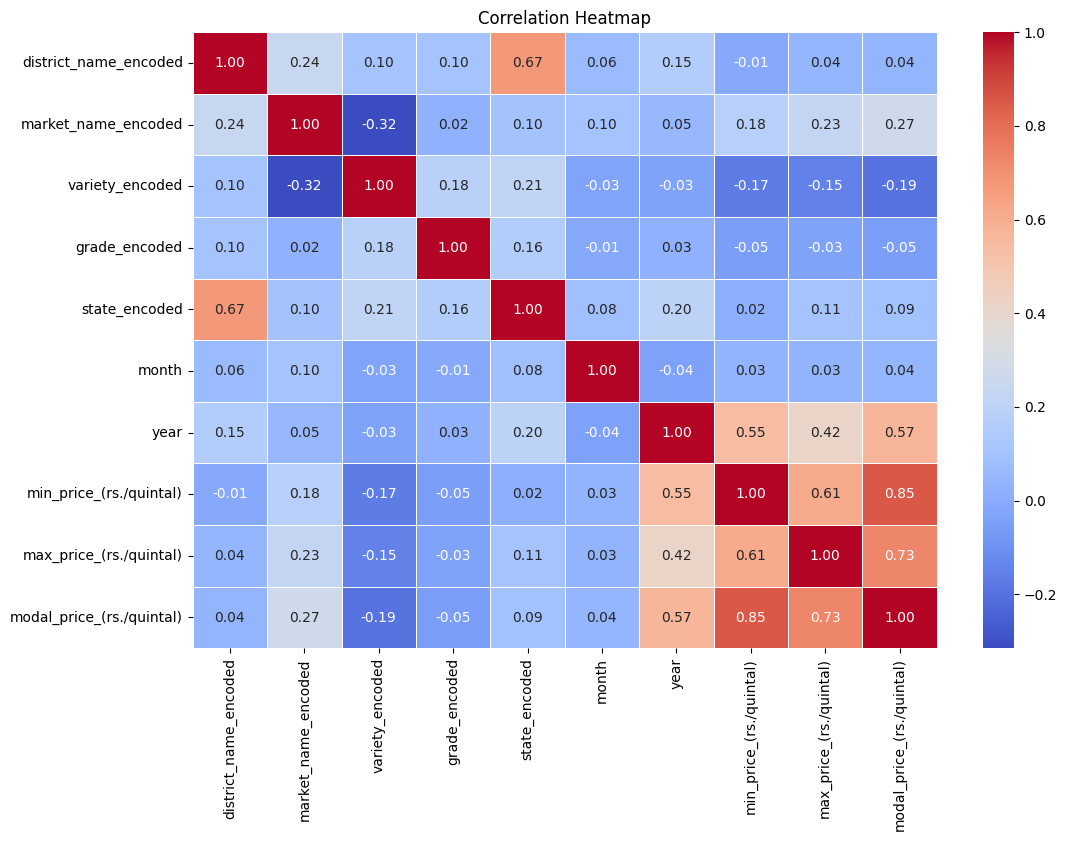

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_encoded is your DataFrame
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Models and Evaluation

In [ ]:
# Evaluation Metrics

def Emetrics(y_test,y_pred):
  from sklearn import metrics

  # Print result of MAE
  print(f"Mean Absoulute error is : {metrics.mean_absolute_error(y_test,y_pred)}")

  # Print result of RMSE
  print(f"Root Mean Square error is: {np.sqrt(metrics.mean_squared_error(y_test,y_pred))}")

  # Print result of R2
  print(f"R2 score is: {metrics.r2_score(y_test,y_pred)}")

In [ ]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,2324,1,2625,461040,2451,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,93,91,305407,461040,2451,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,93,91,305407,461040,2451,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,93,91,305407,461040,2451,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,93,91,305407,461040,2451,3,2014,2014-03-20,1548.0,1610.0,1579.0


In [ ]:
df_encoded['grade_encoded'].unique()

array([461040,   9400,     65,     42])

# Outlier Removing rows

In [ ]:

import pandas as pd
from scipy.stats import zscore

# Assuming df_encoded is your DataFrame
# Replace 'df_encoded' with your actual DataFrame name

# Function to identify outliers using Z-score
def identify_outliers_zscore(df, threshold=3):
    z_scores = zscore(df.select_dtypes(include=['float64', 'int64']))
    outliers = (abs(z_scores) > threshold).any(axis=1)
    return outliers

# Identify outliers
outliers = identify_outliers_zscore(df_encoded)

# Remove rows with outliers
df_cleaned = df_encoded[~outliers]

In [ ]:
df_encoded = df_cleaned

In [ ]:
df_encoded['grade_encoded'].nunique()

1

## Standardizing values (min-max scalar)

In [ ]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,2324,1,2625,461040,2451,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,93,91,305407,461040,2451,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,93,91,305407,461040,2451,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,93,91,305407,461040,2451,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,93,91,305407,461040,2451,3,2014,2014-03-20,1548.0,1610.0,1579.0
...,...,...,...,...,...,...,...,...,...,...,...
470542,837,837,305407,461040,2669,6,2012,2012-06-16,1250.0,2200.0,1350.0
470543,837,837,305407,461040,2669,6,2012,2012-06-15,1300.0,2100.0,1400.0
470544,837,837,305407,461040,2669,6,2012,2012-06-14,1275.0,2275.0,1325.0
470545,837,837,305407,461040,2669,6,2012,2012-06-13,1250.0,2300.0,1300.0


In [ ]:
# Columns to be scaled
columns_to_scale = ['district_name_encoded', 'market_name_encoded', 'variety_encoded', 'grade_encoded', 'state_encoded']

# Min-Max Scaling

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
df_encoded[columns_to_scale] = min_max_scaler.fit_transform(df_encoded[columns_to_scale])


# Standard Scaling
"""
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df_encoded[columns_to_scale] = standard_scaler.fit_transform(df_encoded[columns_to_scale])
"""


# Robust Scaling
"""
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()
df_encoded[columns_to_scale] = robust_scaler.fit_transform(df_encoded[columns_to_scale])
"""

# Power Transformer
"""
from sklearn.preprocessing import PowerTransformer

power_transformer = PowerTransformer(method='yeo-johnson')
df_encoded[columns_to_scale] = power_transformer.fit_transform(df_encoded[columns_to_scale])
"""

# Quantile Transformer - uniform
"""
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='uniform')
df_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])
"""

# Quantile Transformer - normal
"""
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution='normal')
df_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])
"""

"\nfrom sklearn.preprocessing import QuantileTransformer\n\nquantile_transformer = QuantileTransformer(output_distribution='normal')\ndf_encoded[columns_to_scale] = quantile_transformer.fit_transform(df_encoded[columns_to_scale])\n"

In [ ]:
df_encoded.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.084170,0.000000,0.008592,0.0,0.009613,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,0.003333,0.018852,1.000000,0.0,0.009613,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,0.003333,0.018852,1.000000,0.0,0.009613,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,0.003333,0.018852,1.000000,0.0,0.009613,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,0.003333,0.018852,1.000000,0.0,0.009613,3,2014,2014-03-20,1548.0,1610.0,1579.0


In [ ]:
df_encoded['grade_encoded'].nunique()

1

## Forward Stepwise Selection

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

def forward_stepwise_selection(X, y):
    # Initialize an empty set of features
    selected_features = []

    # Initialize a linear regression model
    model = LinearRegression()

    # Loop until all features have been added to the model
    while len(selected_features) < X.shape[1]:

        # Initialize variables to keep track of best feature and score
        best_feature = None
        best_score = -np.inf

        # Loop over all remaining features
        for feature in X.columns:
            if feature not in selected_features:
                # Fit a model with the current set of features plus the new feature
                current_features = selected_features + [feature]
                X_current = X[current_features]
                model.fit(X_current, y)

                # Calculate the score for the new model
                y_pred = model.predict(X_current)
                score = r2_score(y, y_pred)

                # Keep track of the best feature and score
                if score > best_score:
                    best_feature = feature
                    best_score = score

        # Add the best feature to the selected features and print the result
        selected_features.append(best_feature)
        print(f'Selected feature: {best_feature}, Score: {best_score:.4f}')

    return selected_features


In [ ]:
X = df_encoded.loc[:, ['district_name_encoded',	'market_name_encoded',	'variety_encoded',	'grade_encoded',	'state_encoded',	'month',	'year']]
y = df_encoded.loc[:, ['min_price_(rs./quintal)',	'max_price_(rs./quintal)',	'modal_price_(rs./quintal)']]

In [ ]:
print(forward_stepwise_selection(X, y))

Selected feature: year, Score: 0.4020
Selected feature: market_name_encoded, Score: 0.4533
Selected feature: district_name_encoded, Score: 0.4651
Selected feature: state_encoded, Score: 0.4708
Selected feature: variety_encoded, Score: 0.4751
Selected feature: month, Score: 0.4770
Selected feature: grade_encoded, Score: 0.4770
['year', 'market_name_encoded', 'district_name_encoded', 'state_encoded', 'variety_encoded', 'month', 'grade_encoded']


### All the features are closely important

In [ ]:
X.head(5)

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year
0,0.084170,0.000000,0.008592,0.0,0.009613,6,2009
1,0.003333,0.018852,1.000000,0.0,0.009613,5,2014
2,0.003333,0.018852,1.000000,0.0,0.009613,5,2014
3,0.003333,0.018852,1.000000,0.0,0.009613,5,2014
4,0.003333,0.018852,1.000000,0.0,0.009613,3,2014


In [ ]:
y.head(5)

,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,1400.0,1600.0,1500.0
1,1625.0,1680.0,1653.0
2,1500.0,1560.0,1530.0
3,1500.0,1600.0,1550.0
4,1548.0,1610.0,1579.0


## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4, random_state = 42)

In [ ]:
from sklearn.linear_model import LinearRegression
lnregressor = LinearRegression()
lnregressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = lnregressor.predict(X_test)
y_pred

array([[1120.77159385, 1174.72915647, 1146.48435228],
       [1574.88395563, 1764.83960856, 1674.23521105],
       [1558.68281604, 1773.08500669, 1668.65945163],
       ...,
       [1460.41917246, 1689.11887862, 1578.40868662],
       [1507.77178528, 1683.03690449, 1600.28152814],
       [1755.15663474, 1836.89047169, 1792.27323573]])

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 213.89495845578185
Root Mean Square error is: 294.19992832827563
R2 score is: 0.4768476627828721


## Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model using the training sets
dt_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = dt_regressor.predict(X_test)

In [ ]:
# Evaluation metrics for Linear Regression
Emetrics(y_test,y_pred)

Mean Absoulute error is : 64.09077399870064
Root Mean Square error is: 126.70439010392828
R2 score is: 0.9018157277777584


## Random Forest Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=250, random_state=42, bootstrap=True, max_depth=70)

# Train the model using the training sets
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rf_regressor.predict(X_test)

In [ ]:
Emetrics(y_test,y_pred)

Mean Absoulute error is : 62.84889150139446
Root Mean Square error is: 120.55491741053496
R2 score is: 0.9112083476059819


## XgBoost Regression

In [ ]:
from xgboost import XGBRegressor
# Create the XGBoost regression model
xg_regressor = XGBRegressor(n_estimators=250, learning_rate=0.29,random_state=42)

# Train the model
xg_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = xg_regressor.predict(X_test)

# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 80.17601182057338
Root Mean Square error is: 131.17442039154645
R2 score is: 0.8946694048948153


## KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Create the KNN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=7)  # You can adjust the number of neighbors as needed

# Train the model
knn_regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = knn_regressor.predict(X_test)


# Evaluate the model's performance
Emetrics(y_test,y_pred)

Mean Absoulute error is : 77.49078105994052
Root Mean Square error is: 145.92016648732155
R2 score is: 0.8703004507435295


# Datasets of Wheat

## Main

In [ ]:
df

,district_name,market_name,variety,grade,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal),price_date,state,month,year,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded
0,Visakhapatnam,Anakapally,Lok-1,FAQ,1400.0,1600.0,1500.0,2009-06-27,Andhra Pradesh,6,2009,2324,1,2625,461040,2451
1,Cuddapah,Cuddapah,Other,FAQ,1625.0,1680.0,1653.0,2014-05-13,Andhra Pradesh,5,2014,93,91,305407,461040,2451
2,Cuddapah,Cuddapah,Other,FAQ,1500.0,1560.0,1530.0,2014-05-12,Andhra Pradesh,5,2014,93,91,305407,461040,2451
3,Cuddapah,Cuddapah,Other,FAQ,1500.0,1600.0,1550.0,2014-05-10,Andhra Pradesh,5,2014,93,91,305407,461040,2451
4,Cuddapah,Cuddapah,Other,FAQ,1548.0,1610.0,1579.0,2014-03-20,Andhra Pradesh,3,2014,93,91,305407,461040,2451
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470542,Ajmer,Ajmer (Grain),Other,FAQ,1250.0,2200.0,1350.0,2012-06-16,Rajasthan,6,2012,837,837,305407,461040,2669
470543,Ajmer,Ajmer (Grain),Other,FAQ,1300.0,2100.0,1400.0,2012-06-15,Rajasthan,6,2012,837,837,305407,461040,2669
470544,Ajmer,Ajmer (Grain),Other,FAQ,1275.0,2275.0,1325.0,2012-06-14,Rajasthan,6,2012,837,837,305407,461040,2669
470545,Ajmer,Ajmer (Grain),Other,FAQ,1250.0,2300.0,1300.0,2012-06-13,Rajasthan,6,2012,837,837,305407,461040,2669


### Saving the dataframe of wheat

> Indented block



In [ ]:
df.to_csv('wdf.csv')

## Encoded

In [ ]:
df_encoded

,district_name_encoded,market_name_encoded,variety_encoded,grade_encoded,state_encoded,month,year,price_date,min_price_(rs./quintal),max_price_(rs./quintal),modal_price_(rs./quintal)
0,0.084170,0.000000,0.008592,0.0,0.009613,6,2009,2009-06-27,1400.0,1600.0,1500.0
1,0.003333,0.018852,1.000000,0.0,0.009613,5,2014,2014-05-13,1625.0,1680.0,1653.0
2,0.003333,0.018852,1.000000,0.0,0.009613,5,2014,2014-05-12,1500.0,1560.0,1530.0
3,0.003333,0.018852,1.000000,0.0,0.009613,5,2014,2014-05-10,1500.0,1600.0,1550.0
4,0.003333,0.018852,1.000000,0.0,0.009613,3,2014,2014-03-20,1548.0,1610.0,1579.0
...,...,...,...,...,...,...,...,...,...,...,...
470542,0.030291,0.175115,1.000000,0.0,0.010469,6,2012,2012-06-16,1250.0,2200.0,1350.0
470543,0.030291,0.175115,1.000000,0.0,0.010469,6,2012,2012-06-15,1300.0,2100.0,1400.0
470544,0.030291,0.175115,1.000000,0.0,0.010469,6,2012,2012-06-14,1275.0,2275.0,1325.0
470545,0.030291,0.175115,1.000000,0.0,0.010469,6,2012,2012-06-13,1250.0,2300.0,1300.0


### Saving the encoded dataframe of wheat

In [ ]:
df_encoded.to_csv('wencdf.csv')

# Saving the Best Model

In [ ]:
import pickle

# Pickle the model
with open('rf_regressor.pkl', 'wb') as f:
    pickle.dump(rf_regressor, f)